In [1]:
import sys
import math
import numpy as np
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.models import load_model
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,LearningRateScheduler

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_base_model(optimizer):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# define cnn model
def define_base_model_with_dropout(optimizer):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# define cnn model
def define_base_model_with_dropout_and_batch_normalization(optimizer):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    #opt = SGD(lr=0.1, momentum=0.9)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.show()
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    #plt.close()

def step_decay(epochs):
    
    initial_lrate=0.1
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epochs)/epochs_drop))
    return lrate

def plot_losses(history):  
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

def plot_graph(history, epochs):

    plt.style.use("bmh")
    #plt.style.use("seaborn-bright")
    #plt.style.use("default")
    plt.figure()

    plt.plot(epochs, history.history["loss"], label="Training loss")
    plt.plot(epochs, history.history["val_loss"], label="Validation loss")
    plt.plot(epochs, history.history["accuracy"], label="Training accuracy")
    plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy")

    plt.title("Training loss and accuracy of our system")
    plt.xlabel("Number of Epoch")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="upper right")
    
    # plt.savefig(args["plot"])
    plt.show()
    #plt.close()

# run the test harness for evaluating a model
def run_model_fit(model, epochs, batch_size, checkpoint_path):
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # create data generator
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    #datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
    #  height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    #  horizontal_flip=True, fill_mode="nearest")
    # prepare iterator
    it_train = datagen.flow(trainX, trainY, batch_size=batch_size)
    # fit model
    steps = int(trainX.shape[0] / batch_size)
    #cp_callback = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True)
    #lrate = LearningRateScheduler(step_decay)

    #history = model.fit(trainX, trainY,  epochs=epochs, 
    #            validation_data=(testX, testY), verbose=1)
    history = model.fit_generator(it_train, 
                #steps_per_epoch=steps, 
                epochs=epochs, 
                #callbacks=[cp_callback, lrate], 
                validation_data=(testX, testY), verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))

    return history, trainX, trainY, testX, testY

In [2]:
epochs = 200
batch_size = 64
checkpoint_path = "cnn-778/cnn-778.ckpt"
#optimizer = SGD(lr=0.001, momentum=0.9)
#optimizer = SGD(lr=0.1, momentum=0.9)
optimizer = 'adam'
# define model
#model = define_base_model(optimizer)
#model = define_base_model_with_dropout(optimizer)
model = define_base_model_with_dropout_and_batch_normalization(optimizer)

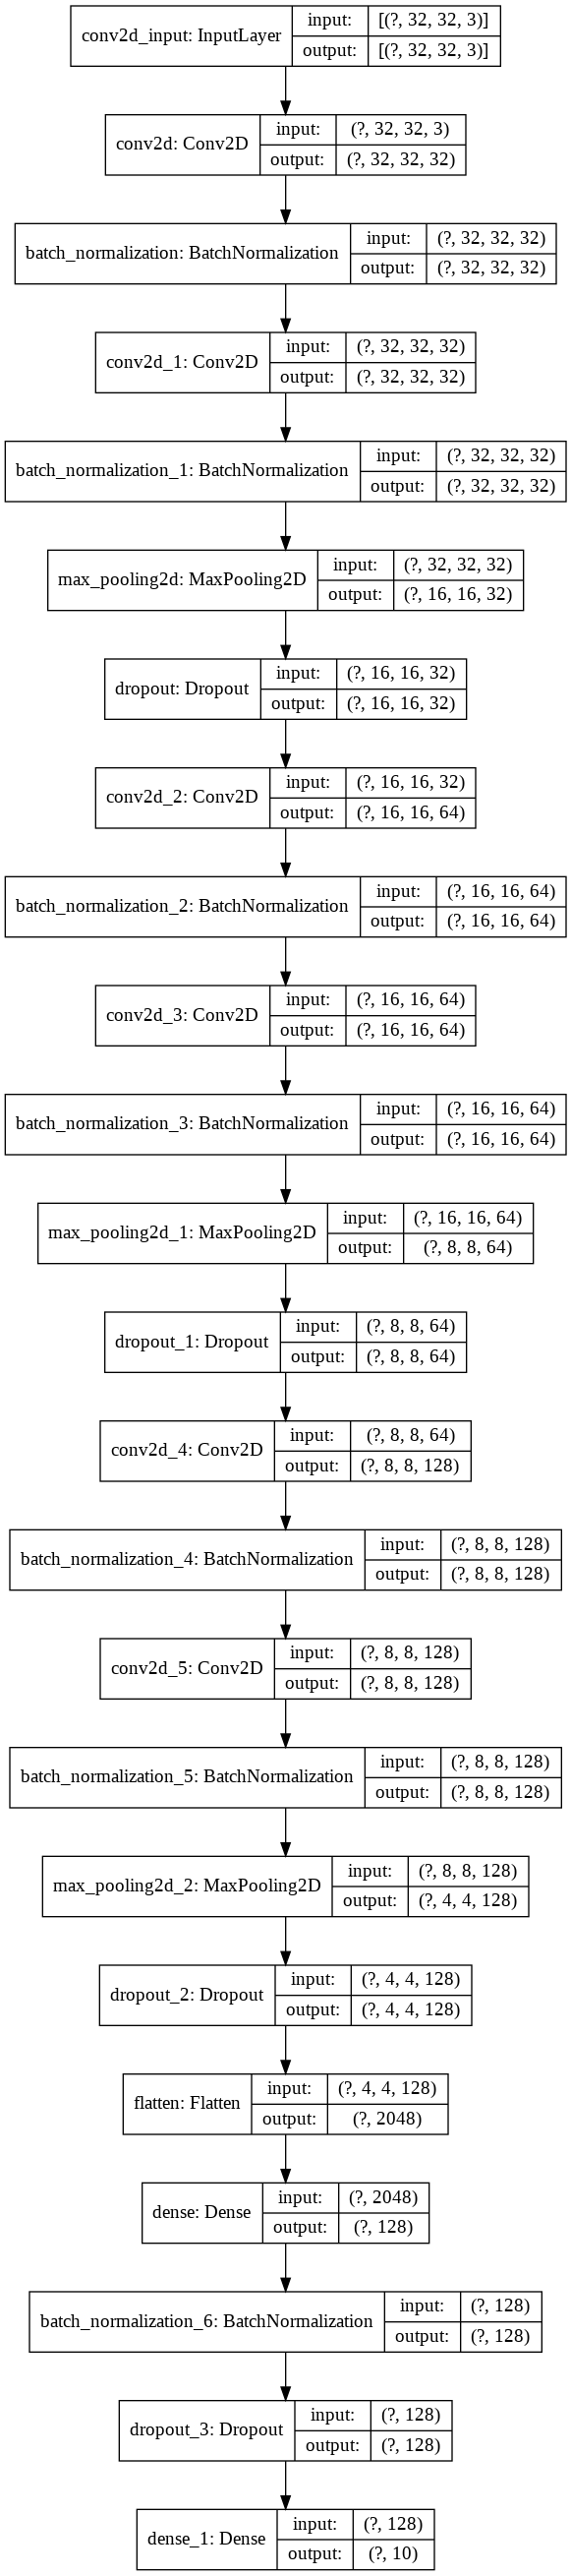

In [3]:
#draw model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB',
        expand_nested=True, dpi=96)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [5]:
# run the model
history, trainX, trainY, testX, testY = run_model_fit(model, epochs, batch_size, checkpoint_path)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
782/782 [==============================] - 25s 32ms/step - loss: 1.5302 - accuracy: 0.4571 - val_loss: 1.1523 - val_accuracy: 0.5913
Epoch 2/200
782/782 [==============================] - 25s 32ms/step - loss: 1.0819 - accuracy: 0.6163 - val_loss: 0.9225 - val_accuracy: 0.6763
Epoch 3/200
782/782 [==============================] - 25s 31ms/step - loss: 0.9034 - accuracy: 0.6839 - val_loss: 0.8675 - val_accuracy: 0.7058
Epoch 4/200
782/782 [==============================] - 25s 31ms/step - loss: 0.8000 - accuracy: 0.7199 - val_loss: 0.7816 - val_accuracy: 0.7362
Epoch 5/200
782/782 [==============================] - 25s 31ms/step - loss: 0.7402 - accuracy: 0.7428 - val_loss: 0.7207 - val_accuracy: 0.7500
Epoch 6/200
782/782 [==============================] - 25s 31ms/step - loss: 0.6875 - accuracy: 0.7615 - val_loss: 0.6843 - val_accuracy: 0.7693
Epoch 7/200
782/782 [==============================] -

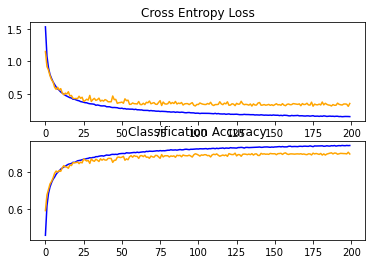

In [6]:
# learning curves
summarize_diagnostics(history)

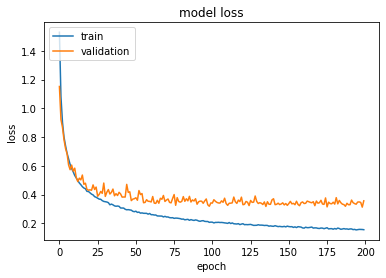

In [7]:
plot_losses(history)

In [8]:
#  plot_graph(history, epochs)

In [9]:
# save model
model.save('final_model.h5')

In [10]:
#load pre-saved model
#model = load_model('final_model.h5')

In [11]:
#evaluate the model
def evaluate_model(model, textX, testY):
    # evaluate the model
    loss, acc = model.evaluate(textX,  testY, verbose=1)
    print("Restored model, loss: {:5.2f}%".format(100*loss))
    print("Restored model, accuracy: {:5.2f}%".format(100*acc))

#evaluate_model(model, testX, testY )